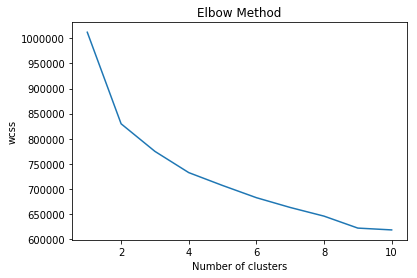

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv(r'D:\Python\betlab.csv')

#заменяем пропуски данных на NaN
data['Age'].replace('', np.nan, inplace=True)

#убираем записи, в которых по полю Age присутсвуют NaN
data.dropna(subset=['Total_amount'], inplace=True)

#убираем выбросы по полю Total amount для адекватности кластеризации 
q = data["Total_amount"].quantile(0.95) 
data = data[data["Age"] < q]

#нормализуем данные
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

#ищем адекватное кол-во кластеров с помощью "метода локтя"
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [2]:
#нашли. Адекватное кол-во кластеров - 3
#с помощью алгоритма к-средних проводим кластеризацию
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)
labels = kmeans.labels_

#формируем новый датасет с метками кластеров
data_k2 = data.assign(Cluster = labels)

#группируем данный датасета по кластерам с вычслением средних значенйи по каждому полю
new_data = data_k2.groupby(['Cluster']).agg({
    
    'Checkamount_mean': 'mean',
    'Total_amount' : 'mean',
    'Total_SKU_qnt' : ['mean','count'],
    'Age' : 'mean',
    'Interval_visit' : 'mean',
    'Days_pastvisit' : 'mean',
    'Cat_householdchem_qnt' : 'mean',
    'Cat_careproducts_qnt' : 'mean',
    'Cat_toiletries_qnt' : 'mean',
    'Cat_healthwellnes_qnt' : 'mean',
    'Cat_babyprod_qnt' : 'mean',
    'Discount_LastMonth' : 'mean',
    
    
}).round(2)
new_data

Checkamount_mean Total_amount Total_SKU_qnt           Age  \
                    mean         mean          mean  count   mean   
Cluster                                                             
0                 258.35      6253.28        384.24   7791  41.94   
1                 116.90      8130.27        673.86  11951  44.19   
2                 155.59     15280.60       1290.78   7614  42.30   

        Interval_visit Days_pastvisit Cat_householdchem_qnt  \
                  mean           mean                  mean   
Cluster                                                       
0                20.10          10.15                 72.56   
1                14.72           3.84                134.99   
2                13.77           2.64                263.01   

        Cat_careproducts_qnt Cat_toiletries_qnt Cat_healthwellnes_qnt  \
                        mean               mean                  mean   
Cluster                                                                 
0                     102.85             150.08                 39.34   
1                     182.82             284.19                 48.07   
2                     347.85             518.24                107.96   

        Cat_babyprod_qnt Discount_LastMonth  
                    mean               mean  
Cluster                                      
0                  19.42               0.82  
1                  23.79               0.95  
2                  53.73               0.98